<a href="https://colab.research.google.com/github/Stealth-here/Ai-Engineering/blob/main/Spam_Email_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix

# Download the dataset from URL or upload manually
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['label_num'] = df.label.map({'ham':0,'spam':1})
X = df['message']
y = df['label_num']


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [6]:
vectorizer = TfidfVectorizer(stop_words='english',max_df = 0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
model = MultinomialNB()
model.fit(X_train_tfidf,y_train)

MultinomialNB()

Classifiction Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



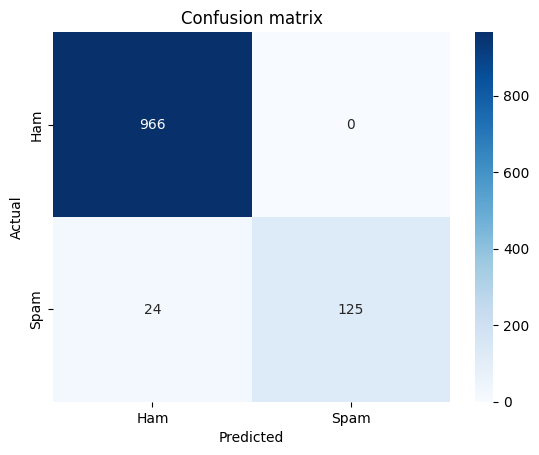

In [10]:
y_pred = model.predict(X_test_tfidf)

print("Classifiction Report:\n",classification_report(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True,fmt='d',cmap = "Blues",xticklabels=['Ham','Spam'],yticklabels = ['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()